In [1]:
import pandas as pd

In [2]:
df_cm = pd.read_csv('data/상권분석서비스(상권변화지표).csv', encoding = 'cp949')
df_cm

,기준_년분기_코드,자치구_코드,자치구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,20243,11200,성동구,LH,상권확장,104,54,107,52
1,20243,11320,도봉구,LL,다이나믹,105,50,107,52
2,20243,11545,금천구,LL,다이나믹,105,51,107,52
3,20243,11110,종로구,HH,정체,130,62,107,52
4,20243,11350,노원구,LL,다이나믹,101,51,107,52
...,...,...,...,...,...,...,...,...,...
595,20241,11590,동작구,HH,정체,108,55,103,52
596,20241,11140,중구,HH,정체,123,62,103,52
597,20241,11380,은평구,LL,다이나믹,98,51,103,52
598,20241,11410,서대문구,LH,상권확장,103,53,103,52


#### 

### 상권 변화 지표에 대한 설명

**LL** : (같은 업종으로) 자치구의 사업체의 평균 영업기간이 "서울시"에서 "생존"한 사업체들의 평균 영업기간보다 낮고,  
"서울시"에서 "폐업"한 사업체들의 평균영업기간보다 낮은 상권 - 도시재생 및 신규 개발 상권으로 창업 진출입시 세심한 주의가 필요한 상권  
  
**LH** : (같은 업종으로) 자치구의 사업체의 평균 영업기간이 "서울시"에서 "생존"한 사업체들의 평균 영업기간보다 낮고,  
"서울시"에서 "폐업"한 사업체들의 평균영업기간보다 높은 상권 - 신규 업체가 경쟁력을 가지는 상권  
  
**HL** : (같은 업종으로) 자치구의 사업체의 평균 영업기간이 "서울시"에서 "생존"한 사업체들의 평균 영업기간보다 높고,  
"서울시"에서 "폐업"한 사업체들의 평균영업기간보다 낮은 상권 - 기존 업체가 경쟁력을 가지는 상권  
  
**HH** : (같은 업종으로) 자치구의 사업체의 평균 영업기간이 "서울시"에서 "생존"한 사업체들의 평균 영업기간보다 높고,  
"서울시"에서 "폐업"한 사업체들의 평균영업기간보다 높은 상권 - 창업 진출입시 세심한 주의가 필요한 상권

#### 

### 상권 변화 지표에 대한 해석

| 등급     | 해석                                      | 의미                                               | 경쟁력/안정성               |
| ------ | --------------------------------------- | ------------------------------------------------ | --------------------- |
| **HH** | 자치구 평균 > 서울 생존 평균 & 자치구 평균 > 서울 폐업 평균 | 이 동네는 오래 버티는 곳이 많다. **굳건한 상권**, **포화 상태일 수도 있음** | 높은 생존력, 진입 난이도 높음     |
| **HL** | 자치구 평균 > 서울 생존 평균 & 자치구 평균 < 서울 폐업 평균 | 오래된 집들이 많지만, **신규 진입은 어려움**                      | 기존 업체는 안정적, 신규 진입엔 불리 |
| **LH** | 자치구 평균 < 서울 생존 평균 & 자치구 평균 > 서울 폐업 평균 | **신규 업체도 적당히 버틴다**, **성장 가능성 있음**                | 신규 창업에 유리             |
| **LL** | 자치구 평균 < 서울 생존 평균 & 자치구 평균 < 서울 폐업 평균 | 생존도 폐업도 다 빨리 일어남 = **불안정**                       | 창업 시 주의 필요            |


#### 

### 상권 변화 지표를 각 숫자로 매핑한 기준과 이유

| 코드 | 의미                    | 창업 관점에서 적절한 점수 |
| -- | --------------------- | -------------- |
| LH | 신규 창업에 유리한 환경         | **4 (가장 유리)**  |
| HL | 기존 업체에 유리 → 창업은 다소 신중 | **3**          |
| HH | 진입 장벽 높음, 경쟁 심함       | **2**          |
| LL | 불안정, 도시재생 중 → 리스크 큼   | **1 (가장 낮음)**  |
창업 가능성이 기준이기 때문에 위와 같이 점수를 매핑함

#### 

In [3]:
df_cm["기준_년분기_코드"].unique()

array([20243, 20191, 20242, 20244, 20234, 20233, 20232, 20231, 20224,
       20223, 20222, 20221, 20214, 20213, 20192, 20212, 20211, 20204,
       20203, 20202, 20201, 20194, 20193, 20241], dtype=int64)

In [4]:
# 모든 자치구가 포함되어 있는지 확인
df_cm["자치구_코드_명"].unique()

array(['성동구', '도봉구', '금천구', '종로구', '노원구', '강북구', '서초구', '마포구', '중랑구',
       '양천구', '중구', '관악구', '성북구', '영등포구', '동대문구', '송파구', '강남구', '구로구',
       '광진구', '강서구', '용산구', '은평구', '강동구', '서대문구', '동작구'], dtype=object)

In [5]:
# 2023년 4분기 데이터만 남기기
df = df_cm[df_cm["기준_년분기_코드"] == 20234].copy()
df = df.reset_index(drop = True)
df.head()

,기준_년분기_코드,자치구_코드,자치구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,20234,11200,성동구,LH,상권확장,100,53,102,51
1,20234,11545,금천구,LL,다이나믹,99,50,102,51
2,20234,11350,노원구,LL,다이나믹,97,50,102,51
3,20234,11320,도봉구,LL,다이나믹,101,49,102,51
4,20234,11110,종로구,HH,정체,126,61,102,51


In [6]:
# 필요한 변수만 필터링
df = df[["자치구_코드_명","상권_변화_지표","운영_영업_개월_평균","폐업_영업_개월_평균","서울_운영_영업_개월_평균","서울_폐업_영업_개월_평균"]]

# 데이터 확인
df.head()

,자치구_코드_명,상권_변화_지표,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,성동구,LH,100,53,102,51
1,금천구,LL,99,50,102,51
2,노원구,LL,97,50,102,51
3,도봉구,LL,101,49,102,51
4,종로구,HH,126,61,102,51


In [7]:
# 시각화 준비
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


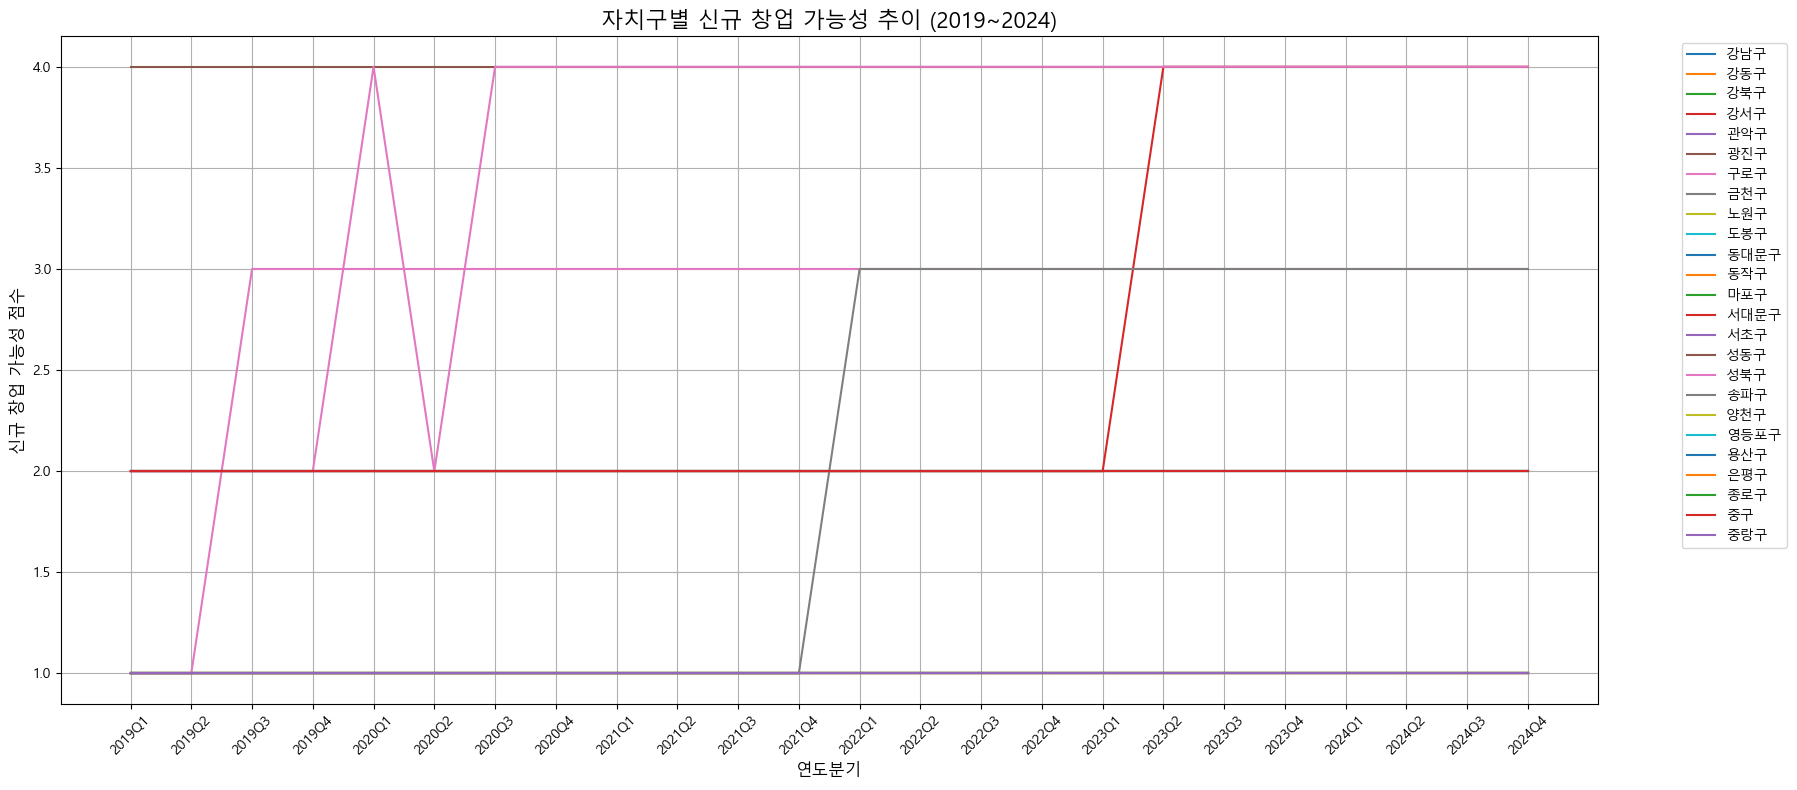

In [8]:
# 점수 매핑
score_map = {'LL': 1, 'HH': 2, 'HL': 3, 'LH': 4}
df_cm['지표점수'] = df_cm['상권_변화_지표'].map(score_map)

# 시간축 생성 (연도+분기)
df_cm['년도'] = df_cm['기준_년분기_코드'].astype(str).str[:4]
df_cm['분기'] = df_cm['기준_년분기_코드'].astype(str).str[4]
df_cm['연도분기'] = df_cm['년도'] + 'Q' + df_cm['분기']

# 연도-분기를 시간 순서로 정렬
df_cm = df_cm.sort_values(by=['년도', '분기'])

# 자치구별로 꺾은선 그래프 그리기
pivot_df = df_cm.pivot_table(index='연도분기', columns='자치구_코드_명', values='지표점수')

# 시각화
plt.figure(figsize=(18, 8))
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column)

plt.title('자치구별 신규 창업 가능성 추이 (2019~2024)', fontsize=16)
plt.xlabel('연도분기', fontsize=12)
plt.ylabel('신규 창업 가능성 점수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


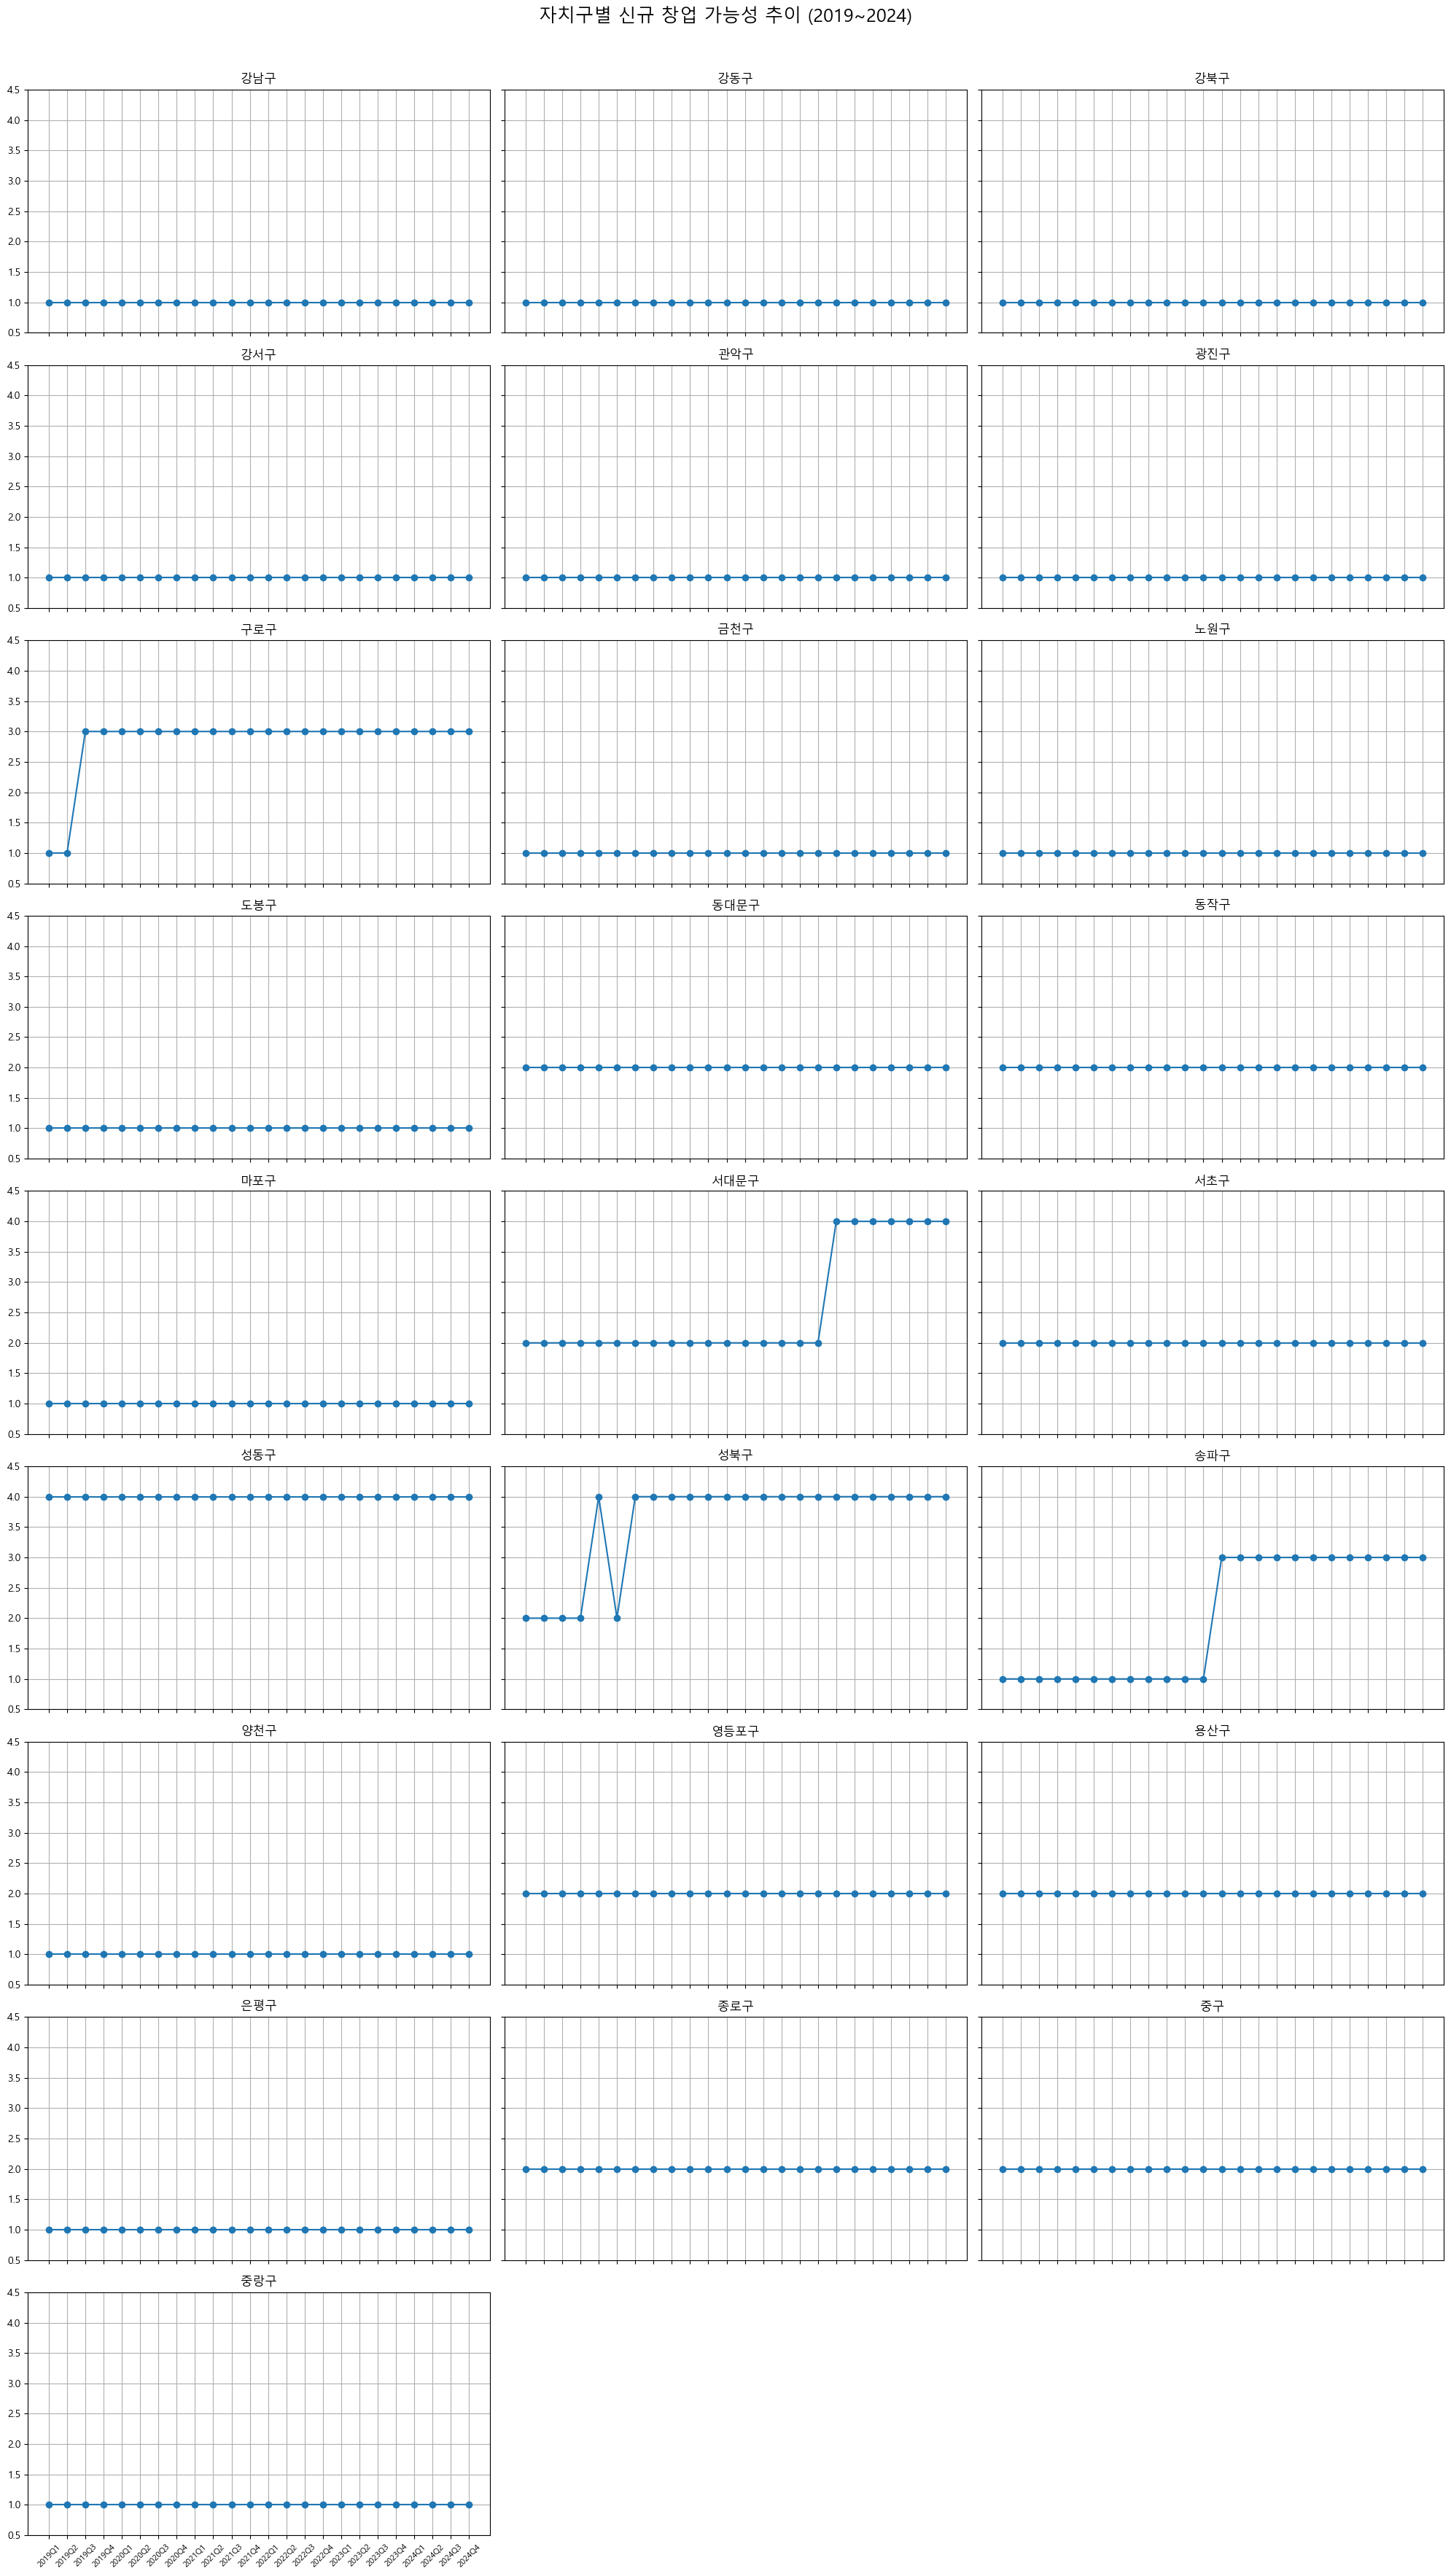

In [9]:
# 한 곳에 모든 자치구를 시각화하니까 변화가 잘 보이지 않음 => 각 자치구별로 시각화

import matplotlib.pyplot as plt
import math

# 고유 자치구 리스트
districts = pivot_df.columns.tolist()
num_districts = len(districts)

# 서브플롯 행, 열 개수 설정 (한 줄에 3개씩)
cols = 3
rows = math.ceil(num_districts / cols)

# 그래프 그리기
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()  # 2D -> 1D로 변환

for i, district in enumerate(districts):
    ax = axes[i]
    ax.plot(pivot_df.index, pivot_df[district], marker='o')
    ax.set_title(district)
    ax.set_xticks(pivot_df.index)
    ax.set_xticklabels(pivot_df.index, rotation=45, fontsize=8)
    ax.set_ylim(0.5, 4.5)
    ax.grid(True)

# 남는 서브플롯 비우기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 전체 제목 및 레이아웃 조정
fig.suptitle('자치구별 신규 창업 가능성 추이 (2019~2024)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


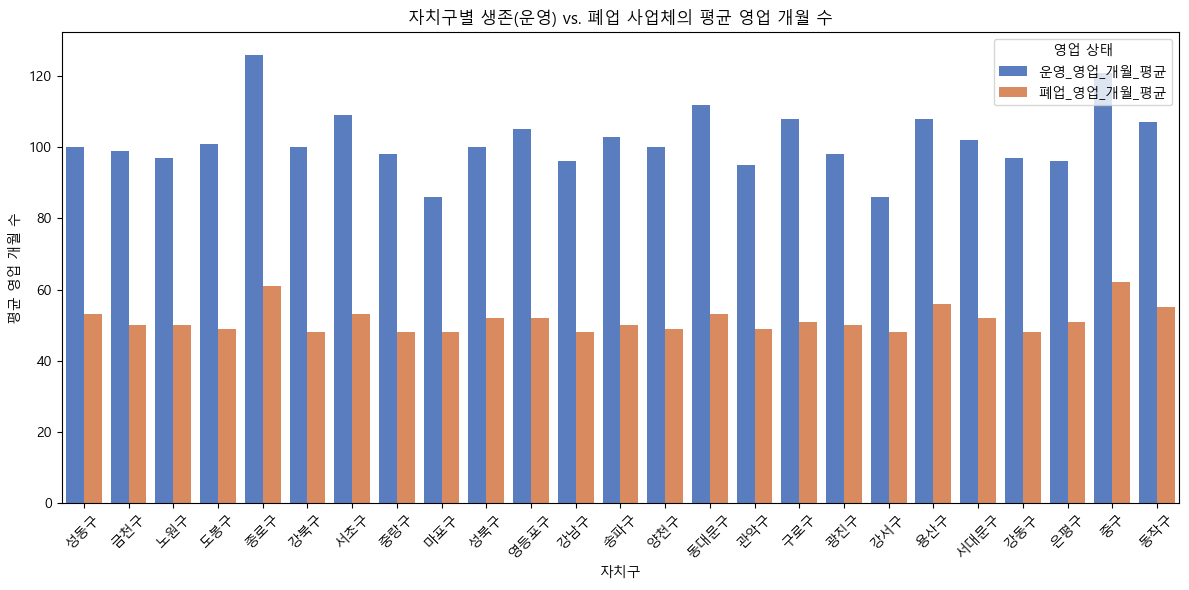

In [10]:
# 2. melt로 데이터 재구성 (자치구별 폐업/운영 평균만 보기)
df_melted = pd.melt(
    df,
    id_vars='자치구_코드_명',
    value_vars=['운영_영업_개월_평균', '폐업_영업_개월_평균'],
    var_name='영업상태',
    value_name='개월'
)
# 3. 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x='자치구_코드_명',
    y='개월',
    hue='영업상태',
    palette='muted',
    ci=None
)
plt.title('자치구별 생존(운영) vs. 폐업 사업체의 평균 영업 개월 수')
plt.xlabel('자치구')
plt.ylabel('평균 영업 개월 수')
plt.xticks(rotation=45)
plt.legend(title='영업 상태')
plt.tight_layout()
plt.show()

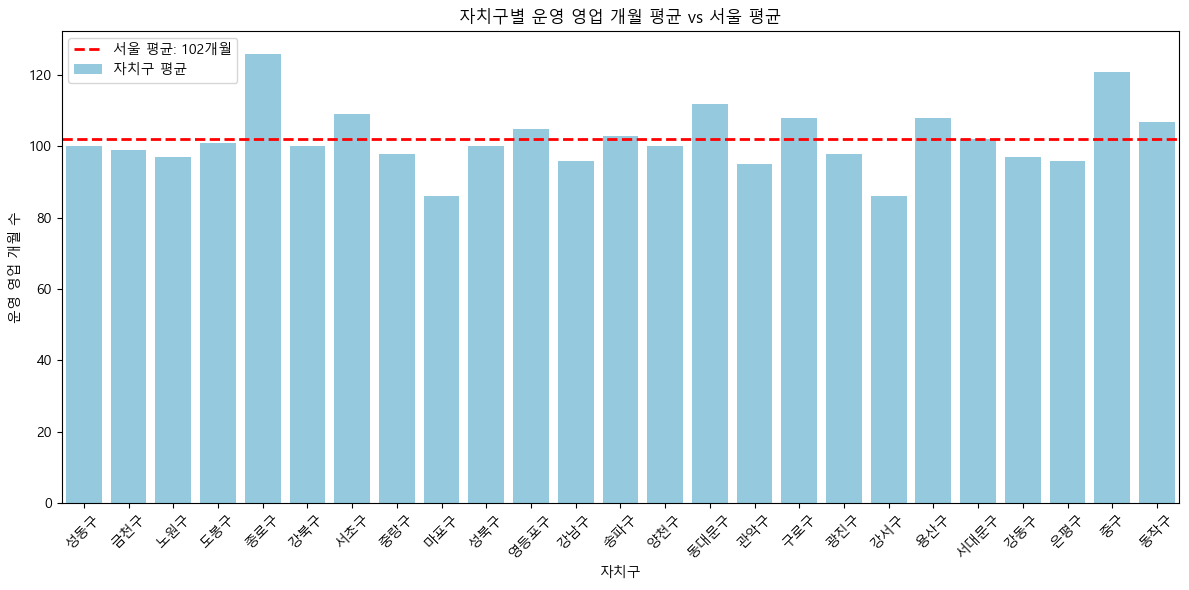

In [11]:
plt.figure(figsize=(12, 6))

# 운영 영업 개월 평균만 먼저 시각화
sns.barplot(
    data=df,
    x='자치구_코드_명',
    y='운영_영업_개월_평균',
    color='skyblue',
    label='자치구 평균'
)

# 서울 평균 선 (예: 102개월)
seoul_operating_avg = df['서울_운영_영업_개월_평균'].iloc[0]  # 모든 행 동일하므로 첫 행 기준
plt.axhline(seoul_operating_avg, color='red', linestyle='--', linewidth=2, label=f'서울 평균: {seoul_operating_avg}개월')

# 그래프 꾸미기
plt.title('자치구별 운영 영업 개월 평균 vs 서울 평균')
plt.xlabel('자치구')
plt.ylabel('운영 영업 개월 수')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

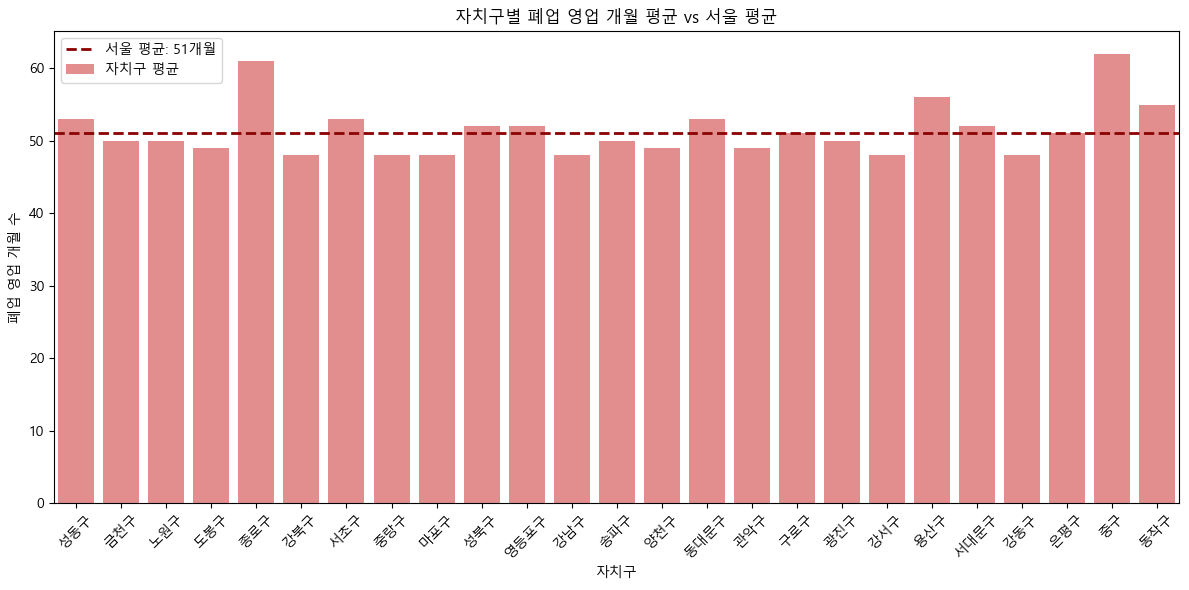

In [12]:
plt.figure(figsize=(12, 6))

# 폐업 영업 개월 평균 막대
sns.barplot(
    data=df,
    x='자치구_코드_명',
    y='폐업_영업_개월_평균',
    color='lightcoral',
    label='자치구 평균'
)

# 서울 폐업 평균 수평선
seoul_closing_avg = df['서울_폐업_영업_개월_평균'].iloc[0]
plt.axhline(seoul_closing_avg, color='darkred', linestyle='--', linewidth=2, label=f'서울 평균: {seoul_closing_avg}개월')

# 그래프 꾸미기
plt.title('자치구별 폐업 영업 개월 평균 vs 서울 평균')
plt.xlabel('자치구')
plt.ylabel('폐업 영업 개월 수')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


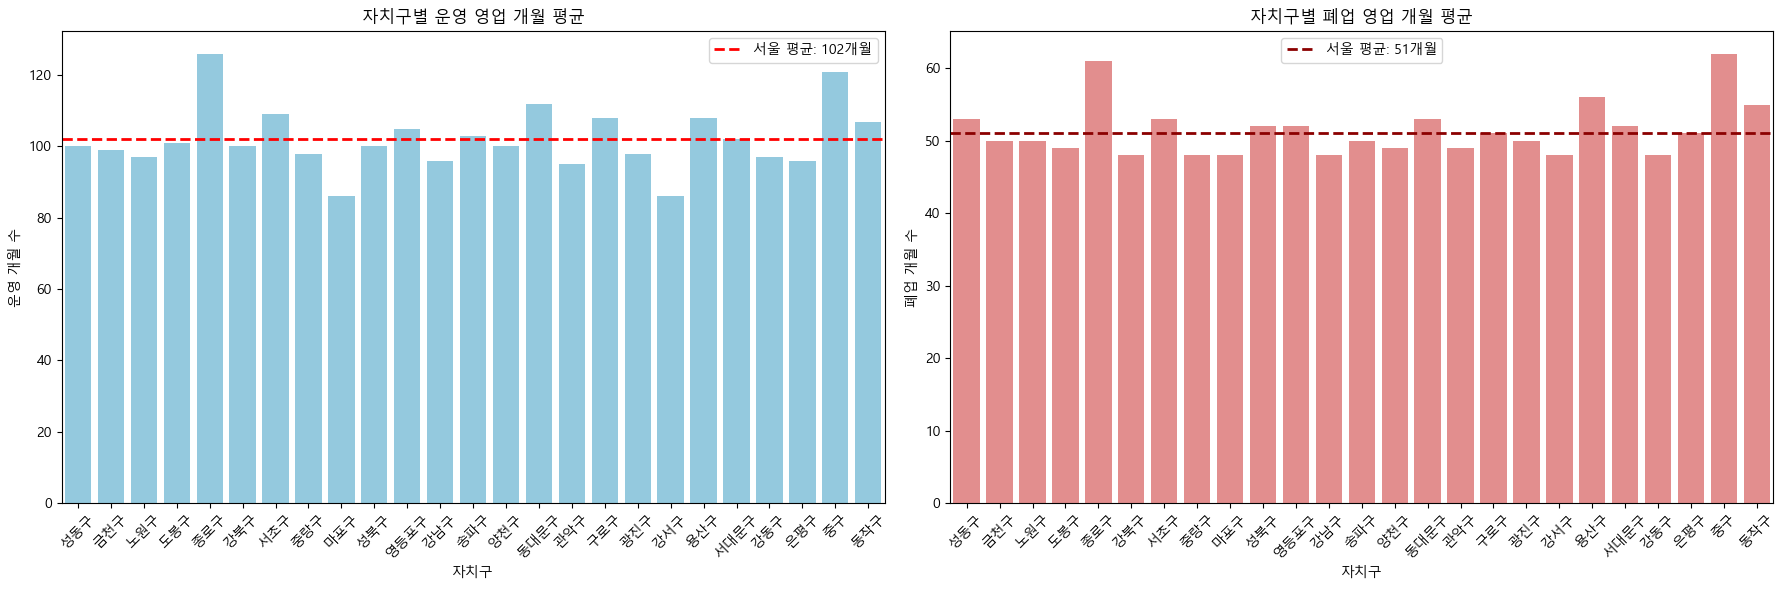

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)  # ← 이 줄이 꼭 필요함!

sns.barplot(
    data=df,
    x='자치구_코드_명',
    y='운영_영업_개월_평균',
    color='skyblue',
    ax=axes[0]
)
seoul_operating_avg = df['서울_운영_영업_개월_평균'].iloc[0]
axes[0].axhline(seoul_operating_avg, color='red', linestyle='--', linewidth=2, label=f'서울 평균: {seoul_operating_avg}개월')

axes[0].set_title('자치구별 운영 영업 개월 평균')
axes[0].set_xlabel('자치구')
axes[0].set_ylabel('운영 개월 수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# ───────────────────────────────────────
# (2) 폐업 영업 개월 평균 그래프
sns.barplot(
    data=df,
    x='자치구_코드_명',
    y='폐업_영업_개월_평균',
    color='lightcoral',
    ax=axes[1]
)
seoul_closing_avg = df['서울_폐업_영업_개월_평균'].iloc[0]
axes[1].axhline(seoul_closing_avg, color='darkred', linestyle='--', linewidth=2, label=f'서울 평균: {seoul_closing_avg}개월')

axes[1].set_title('자치구별 폐업 영업 개월 평균')
axes[1].set_xlabel('자치구')
axes[1].set_ylabel('폐업 개월 수')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

#### 

### 상권변화지표(문자열)를 분석에 용이하도록 숫자형 데이터으로 변경  
변경된 데이터는 성장가능성이라는 변수에 넣음

In [14]:
score_map = {'LL': 1, 'HH': 2, 'HL': 3, 'LH': 4}
df['성장가능성'] = df['상권_변화_지표'].map(score_map).copy()
df.head()

,자치구_코드_명,상권_변화_지표,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,성장가능성
0,성동구,LH,100,53,102,51,4
1,금천구,LL,99,50,102,51,1
2,노원구,LL,97,50,102,51,1
3,도봉구,LL,101,49,102,51,1
4,종로구,HH,126,61,102,51,2


In [15]:
# 컬럼명 맞추기
temp_df = df.copy()
temp_df = temp_df.rename(columns={'자치구_코드_명': '자치구'})
temp_df.head()

,자치구,상권_변화_지표,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,성장가능성
0,성동구,LH,100,53,102,51,4
1,금천구,LL,99,50,102,51,1
2,노원구,LL,97,50,102,51,1
3,도봉구,LL,101,49,102,51,1
4,종로구,HH,126,61,102,51,2


In [16]:
df_gp = temp_df[["자치구", "상권_변화_지표", "성장가능성"]]
df_gp.head()

,자치구,상권_변화_지표,성장가능성
0,성동구,LH,4
1,금천구,LL,1
2,노원구,LL,1
3,도봉구,LL,1
4,종로구,HH,2


#### 

### csv 파일로 저장

In [17]:
df_gp.to_csv("./data/자치구별_상권변화지표.csv", index=False, encoding='utf-8-sig')